### Manually calculate mean:

In [1]:
# function to take list of values (list_values) and return mean
def mean_values(list_values):
    mean = 0
    list_length = 0
    
    # iterate through element in list_values
    for element in list_values:
        # for every element, increase list_length
        list_length += 1
    
    # iterate through each element of list
    for num in list_values:
        # mean conversation: mean = sum of num / amount of num
        mean = mean + num/list_length
    
    return mean

In [2]:
mean_values([9, 10, 12])

10.333333333333334

### Manually calculate standard deviation

In [3]:
# calculate standard deviation
def standard_deviation(list_values):
    mean = 0
    list_length = 0
    squared_diff = []
    squared_sum = 0
    standard_deviation = 0
    
    # find mean of list_values
    # iterate through element in list_values
    for element in list_values:
        # for every element, increase list_length
        list_length += 1
    
    # iterate through each element of list
    for num in list_values:
        # mean conversation: mean = sum of num / amount of num
        mean = mean + num/list_length
    
    # list of squared differences
    for num in list_values:
        squared_diff.append((num-mean)**2)
    
    # find sum of the squared differences
    for num in squared_diff:
        squared_sum += num
    
    # standard deviation is the square root of the squared_sum divided by list_length-1
    standard_deviation = ((squared_sum/(list_length-1))**0.5)
    
    return standard_deviation

### Data cleaning function

In [4]:
# function take a string number and returns as a float
def percent_dec_approx(num_per):
    updated_string = ''
    string_to_float = 0.0
    
    # iterate through each character of string
    for char in num_per:
        # add any char != '% to updated_string
        if char != '%' and '.':
            updated_string += char
    # convert updated_string into a float
    # num_per returned without the percentage and a float
    string_to_float = float(updated_string)
    
    # converts float to decimal approximation
    percent_dec_approx = string_to_float/100

    return percent_dec_approx

In [1]:
# Imports:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Cleaning sat_2019.csv

In [6]:
# import data
sat_2019 = pd.read_csv('../data/sat_2019.csv')
# display dataframe
sat_2019.head()

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


In [7]:
# check for missing (or null) values
sat_2019.isnull().sum()

State                 0
Participation Rate    0
EBRW                  0
Math                  0
Total                 0
dtype: int64

In [8]:
# information on sat_2019
sat_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               53 non-null     object
 1   Participation Rate  53 non-null     object
 2   EBRW                53 non-null     int64 
 3   Math                53 non-null     int64 
 4   Total               53 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.2+ KB


In [9]:
# check for any other null values that don't appear as so
sat_2019.sort_values('Participation Rate', ascending = False)

,State,Participation Rate,EBRW,Math,Total
47,Virgin Islands,—,490,445,935
39,Puerto Rico,—,483,462,944
19,Maine,99%,512,502,1013
50,West Virginia,99%,483,460,943
29,New Hampshire,95%,533,526,1059
8,District of Columbia,94%,495,480,975
26,Montana,9%,603,596,1199
30,New Jersey,82%,544,545,1090
20,Maryland,82%,535,523,1058
21,Massachusetts,81%,559,561,1120


In [10]:
# change '-' to NaN
sat_2019['Participation Rate'] = sat_2019['Participation Rate'].map(lambda rate: np.nan if rate == '—' else rate)

In [11]:
# dropped NaN values
sat_2019.dropna(inplace = True)

In [12]:
# used percent_dec_approx(num_per) to convert Participation Rate to float
# .map goes through every cell and runs the function
sat_2019['Participation'] = sat_2019['Participation Rate'].map(percent_dec_approx)
sat_2019.head()

,State,Participation Rate,EBRW,Math,Total,Participation
0,Alabama,7%,583,560,1143,0.07
1,Alaska,41%,556,541,1097,0.41
2,Arizona,31%,569,565,1134,0.31
3,Arkansas,6%,582,559,1141,0.06
4,California,63%,534,531,1065,0.63


In [13]:
# dropped Participation because we have a float Participation Percent now
sat_2019.drop('Participation Rate', inplace = True, axis = 1)
sat_2019.head()

,State,EBRW,Math,Total,Participation
0,Alabama,583,560,1143,0.07
1,Alaska,556,541,1097,0.41
2,Arizona,569,565,1134,0.31
3,Arkansas,582,559,1141,0.06
4,California,534,531,1065,0.63


In [14]:
sat_2019.rename(columns = {
                'State': 'state',
                'EBRW': 'reading',
                'Math': 'math',
                'Total': 'total_score',
                'Participation': 'participation'  
}, inplace = True)

### Exploratory Data Analysis

In [15]:
# .describe() will give summary statistics for each of your column
sat_2019.describe()

,reading,math,total_score,participation
count,51.000000,51.000000,51.000000,51.000000
mean,560.803922,552.196078,1113.078431,0.490588
std,46.248035,51.290553,97.197910,0.387476
min,483.000000,460.000000,943.000000,0.020000
25%,527.500000,511.500000,1038.000000,0.055000
50%,550.000000,546.000000,1097.000000,0.540000
75%,612.000000,599.000000,1210.000000,0.820000
max,636.000000,648.000000,1284.000000,1.000000


In [16]:
# which states have the highest and lowest participation rates for SAT in 2019?
sat_2019['participation'].value_counts()
# observation: 8 states have 100% participation 
sat_2019.sort_values(['participation', 'total_score','state'], ascending = False).head(10)
sat_2019.sort_values(['participation', 'total_score','state'], ascending = False).tail(5)

# observations:
# sorted by participation, then by total_score, then will show states
# Connecticut had the highest total_score of the states with 100% participation at 1046
# North Dakota had the lowest participation rate at 2%, their average total_score was 1263

,state,reading,math,total_score,participation
27,Nebraska,628,631,1260,0.03
15,Iowa,622,622,1244,0.03
52,Wyoming,623,615,1238,0.03
24,Mississippi,628,608,1237,0.03
34,North Dakota,627,636,1263,0.02


In [17]:
# which states have the highest and lowest SAT scores in 2019?
sat_2019.sort_values(['total_score','state'], ascending = False).head(10)
sat_2019.sort_values(['total_score','state'], ascending = False).tail(5)

# observations:
# Minnesota had the highest total_score at 1284 with participation of 4%. 
# The top scoring 10 states all had less than 5% participation
# West Virginia had the lowest at 943 with a 99% participation rate
# Oklahoma had a low score at 963 AND low participation at 22%

,state,reading,math,total_score,participation
12,Idaho,505,488,993,1.00
7,Delaware,499,486,985,1.00
8,District of Columbia,495,480,975,0.94
36,Oklahoma,490,472,963,0.22
50,West Virginia,483,460,943,0.99


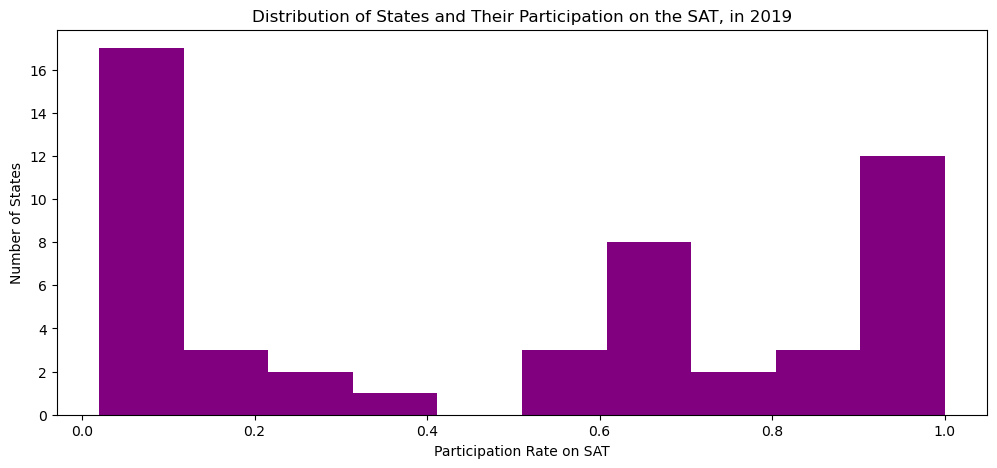

In [18]:
# create a histogram that highlights the participation rate of the dataset
# size
plt.figure(figsize = (12,5))

# plotting
plt.hist(sat_2019['participation'], color = 'purple')

# title
plt.title('Distribution of States and Their Participation on the SAT, in 2019')
# axis labels
plt.xlabel('Participation Rate on SAT')
plt.ylabel('Number of States');

# assume: 1.0 means a state required the ACT
# will not use graph

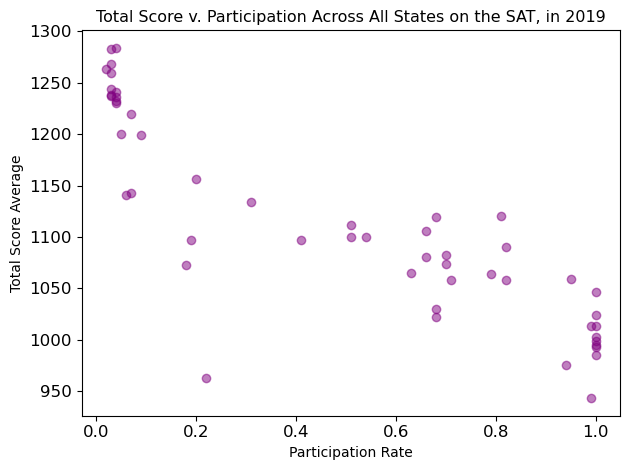

In [21]:
# create a scatter plot to see if there is a connection between composite score average and participation
plt.title('Total Score v. Participation Across All States on the SAT, in 2019', size = 11.5)

plt.scatter(sat_2019['participation'],
           sat_2019['total_score'],
           color = 'purple', alpha = 0.5);

# x and y-axis labels
plt.xlabel('Participation Rate', size = 10)
plt.ylabel('Total Score Average', size = 10);
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12);

# saving scatter plot
plt.tight_layout()
plt.savefig('../graphs/total_score_part_scatter_sat.png')

# plots a point of the states and their average score

In [22]:
# checking correlation
sat_2019.corr()

# conclusion: the numbers are closer to -1, so correlation between the total_score and participation is unlikely

,reading,math,total_score,participation
reading,1.000000,0.986026,0.996134,-0.873453
math,0.986026,1.000000,0.996825,-0.845841
total_score,0.996134,0.996825,1.000000,-0.861786
participation,-0.873453,-0.845841,-0.861786,1.000000


In [23]:
# check which states require participation (==1.0)
req_part = sat_2019[sat_2019['participation'] == 1.0]
req_part

,state,reading,math,total_score,participation
5,Colorado,518,506,1024,1.0
6,Connecticut,529,516,1046,1.0
7,Delaware,499,486,985,1.0
9,Florida,516,483,999,1.0
12,Idaho,505,488,993,1.0
13,Illinois,509,504,1013,1.0
22,Michigan,507,496,1003,1.0
40,Rhode Island,503,492,995,1.0


In [24]:
# sorted_list to show the highest and lowest comp_score of the 100% required
sorted_list = sat_2019[sat_2019['participation'] == 1.0].sort_values(by = 'total_score', ascending = False)
sorted_list

,state,reading,math,total_score,participation
6,Connecticut,529,516,1046,1.0
5,Colorado,518,506,1024,1.0
13,Illinois,509,504,1013,1.0
22,Michigan,507,496,1003,1.0
9,Florida,516,483,999,1.0
40,Rhode Island,503,492,995,1.0
12,Idaho,505,488,993,1.0
7,Delaware,499,486,985,1.0


In [25]:
# pulls only the states (100% participation) with the highest scores
highest_states = sorted_list.head(3)
highest_states

,state,reading,math,total_score,participation
6,Connecticut,529,516,1046,1.0
5,Colorado,518,506,1024,1.0
13,Illinois,509,504,1013,1.0


In [26]:
# pulls only the states (100% participation) with the lowest scores 
lowest_states = sorted_list.tail(3)
lowest_states

,state,reading,math,total_score,participation
40,Rhode Island,503,492,995,1.0
12,Idaho,505,488,993,1.0
7,Delaware,499,486,985,1.0


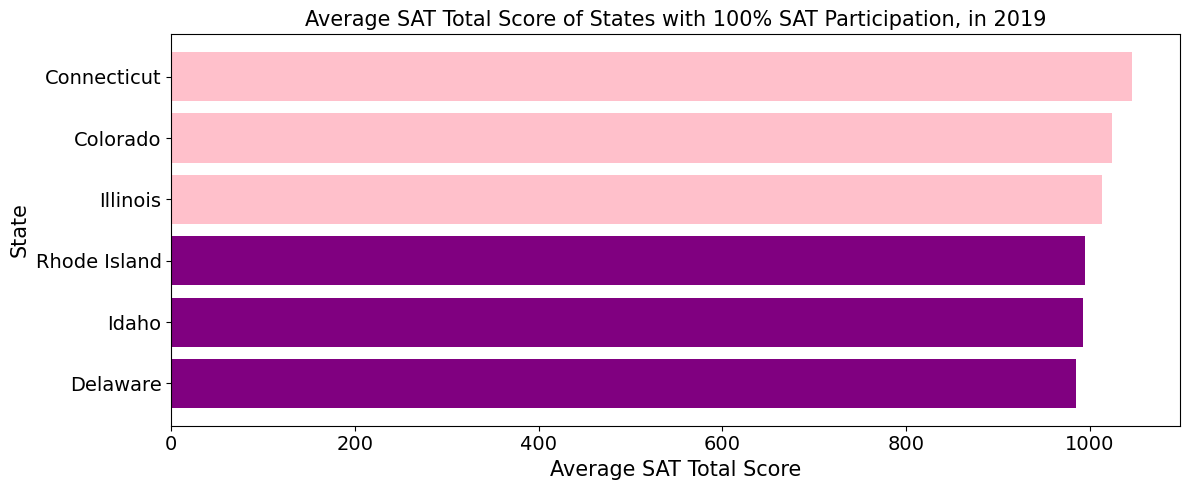

In [27]:
# plt.barh() will create a horizontal bar chart. (Note the h at the end of bar!)

# create our figure
plt.figure(figsize = (12,5))

# horizontal bar chart
plt.barh(lowest_states['state'][::-1],
        lowest_states['total_score'][::-1], color = 'purple') #[::-1] reverses the order,

plt.barh(highest_states['state'][::-1],
        highest_states['total_score'][::-1], color = 'pink') #[::-1] reverses the order,

# add a title
plt.title( 'Average SAT Total Score of States with 100% SAT Participation, in 2019', size = 15)

# add axis labels, tick sizing
plt.ylabel('State', size = 15)
plt.xlabel('Average SAT Total Score', size = 15);
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14);

# saving bar chart
plt.tight_layout()
plt.savefig('../graphs/average_total_score_states_sat.png')

# Point out...Utah and Nevada are right next to each other on the map? 

In [28]:
# reference this data
# https://nces.ed.gov/programs/digest/d20/tables/dt20_702.60.asp
# Note: U.S. has estimated population of children ages 3 - 18 living in households: 65,000,000

In [29]:
# Observations on Connecticute, Colorado, Illinois

# % of children with desktop or laptop
# CT - 92.7% of 653k, CO - 93.3% of 1,122k, IL - 90.9% of 2,524k
# % of children with Internet access on their desktop or laptop
# CT - 91.9%, CO - 92.6%%, IL - 89.4%%

# How many have smartphones?
# All above 95%
# Internet access only via smartphone?
# all less than 6%

# No Internet Access
# CT - 2.4, CO - 2.4, NV - 3.9

In [2]:
# create visual for above statistics
nces_highest = pd.DataFrame(columns = ['Children ages 3 to 18 (thous)','With Desktop or Laptop', '   With Internet Access'],
                            index = ['Connecticut', 'Colorado', 'Illinois'])
nces_highest.loc['Connecticut'] = [653, 92.7, 91.9]
nces_highest.loc['Colorado'] = [1122, 93.3, 92.6]
nces_highest.loc['Illinois'] = [2524, 90.9, 89.4]
                           
nces_highest

,Children ages 3 to 18 (thous),With Desktop or Laptop,With Internet Access
Connecticut,653,92.7,91.9
Colorado,1122,93.3,92.6
Illinois,2524,90.9,89.4


In [31]:
# Observations on Rhode Island, Idaho, Delaware

# % of children with desktop or laptop
# RI - 92.5% of 182k, ID - 92.5% of 410k, DE - 91.2% of 182k
# % of children with Internet access on their desktop or laptop
# RI - 92.3%, ID - 90.9%, DE - 89.8%

# How many have smartphones?
# All above 95%
# Internet access only via smartphone?
# all less than 7%

# No Internet Access
# RI - 1.8%, ID - 3.8%, DE - 4.8%

In [3]:
# create visual for above statistics
nces_lowest = pd.DataFrame(columns = ['Children ages 3 to 18 (thous)','With Desktop or Laptop', '   With Internet Access'],
                            index = ['Rhode Island', 'Idaho', 'Delaware'])
nces_lowest.loc['Rhode Island'] = [182, 92.5, 92.3]
nces_lowest.loc['Idaho'] = [410, 92.5, 90.9]
nces_lowest.loc['Delaware'] = [182, 91.2, 89.8]

nces_lowest

,Children ages 3 to 18 (thous),With Desktop or Laptop,With Internet Access
Rhode Island,182,92.5,92.3
Idaho,410,92.5,90.9
Delaware,182,91.2,89.8
